# EDA(Exploratory Data Analysis)

- It involves examining and understanding the characteristics of your raw data.
- Here are the general steps to perform EDA on raw data and transform it into a cleaner, more understandable form:
- 1. **Understand the Data:** Identify the data types
- 2. **Import Libraries:** import necessary libraries (e.g., Pandas, NumPy, Seaborn, Matplotlib).
- 3. **Load the Data:** Load the raw data into a data structure (e.g., Pandas DataFrame).
- 4. **Handle Missing Data:**(impute, drop, or interpolate missing values).
- 5. **Data Visualization:**
    Create visualizations (histograms, box plots, scatter plots) to identify        patterns, trends, and potential outliers.Use Seaborn, Matplotlib, or      other visualization libraries.

In [20]:
import pandas as pd

In [21]:
raw = pd.read_excel(r'C:\Users\paruc\OneDrive\Desktop\DS\1. Nov\23rd - Eda practicle\EDA- Practicle\Rawdata.xlsx')

In [22]:
raw

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience#$,34 years,Mumbai,5^00#0,2+
1,Teddy^,Testing,45' yr,Bangalore,10%%000,<3
2,Uma#r,Dataanalyst^^#,NaN,NaN,1$5%000,4> yrs
3,Jane,Ana^^lytics,NaN,Hyderbad,2000^0,NaN
4,Uttam*,Statistics,67-yr,NaN,30000-,5+ year
5,Kim,NLP,55yr,Delhi,6000^$0,10+


# Info

In [23]:
raw.columns

Index(['Name', 'Domain', 'Age', 'Location', 'Salary', 'Exp'], dtype='object')

In [24]:
raw.shape

(6, 6)

In [25]:
raw.head()

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience#$,34 years,Mumbai,5^00#0,2+
1,Teddy^,Testing,45' yr,Bangalore,10%%000,<3
2,Uma#r,Dataanalyst^^#,NaN,NaN,1$5%000,4> yrs
3,Jane,Ana^^lytics,NaN,Hyderbad,2000^0,NaN
4,Uttam*,Statistics,67-yr,NaN,30000-,5+ year


In [26]:
raw.tail()

,Name,Domain,Age,Location,Salary,Exp
1,Teddy^,Testing,45' yr,Bangalore,10%%000,<3
2,Uma#r,Dataanalyst^^#,NaN,NaN,1$5%000,4> yrs
3,Jane,Ana^^lytics,NaN,Hyderbad,2000^0,NaN
4,Uttam*,Statistics,67-yr,NaN,30000-,5+ year
5,Kim,NLP,55yr,Delhi,6000^$0,10+


In [27]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      6 non-null      object
 1   Domain    6 non-null      object
 2   Age       4 non-null      object
 3   Location  4 non-null      object
 4   Salary    6 non-null      object
 5   Exp       5 non-null      object
dtypes: object(6)
memory usage: 420.0+ bytes


In [28]:
raw['Domain']

0     Datascience#$
1           Testing
2    Dataanalyst^^#
3       Ana^^lytics
4        Statistics
5               NLP
Name: Domain, dtype: object

In [30]:
raw.isnull().sum()

Name        0
Domain      0
Age         2
Location    2
Salary      0
Exp         1
dtype: int64

In [31]:
raw['Name']

0      Mike
1    Teddy^
2     Uma#r
3      Jane
4    Uttam*
5       Kim
Name: Name, dtype: object

# Cleaning String type data

In [32]:
raw['Name'] = raw['Name'].str.replace(r'\W','',regex = True)

In [33]:
raw['Name']

0     Mike
1    Teddy
2     Umar
3     Jane
4    Uttam
5      Kim
Name: Name, dtype: object

In [34]:
raw['Domain'] = raw['Domain'].str.replace(r'\W','',regex = True)

In [35]:
raw['Domain']

0    Datascience
1        Testing
2    Dataanalyst
3      Analytics
4     Statistics
5            NLP
Name: Domain, dtype: object

In [36]:
raw['Salary'] = raw['Salary'].str.replace(r'\W','',regex = True)

In [37]:
raw

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34 years,Mumbai,5000,2+
1,Teddy,Testing,45' yr,Bangalore,10000,<3
2,Umar,Dataanalyst,NaN,NaN,15000,4> yrs
3,Jane,Analytics,NaN,Hyderbad,20000,NaN
4,Uttam,Statistics,67-yr,NaN,30000,5+ year
5,Kim,NLP,55yr,Delhi,60000,10+


In [38]:
raw.columns

Index(['Name', 'Domain', 'Age', 'Location', 'Salary', 'Exp'], dtype='object')

# Cleaning number type data

str.extract('(\d+)' - will remove 0 so done use in salary 

In [39]:
raw['Age'] = raw['Age'].str.extract('(\d+)')
raw['Exp'] = raw['Exp'].str.extract('(\d+)')

In [40]:
raw

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,NaN,NaN,15000,4
3,Jane,Analytics,NaN,Hyderbad,20000,NaN
4,Uttam,Statistics,67,NaN,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [41]:
clean = raw.copy()

# Filling of numerical data

In [44]:
import numpy as np

In [45]:
clean['Age'] = clean['Age'].fillna(np.mean(pd.to_numeric(clean['Age'])))

In [46]:
clean['Exp'] = clean['Exp'].fillna(np.mean(pd.to_numeric(clean['Exp'])))

In [47]:
clean

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50.25,NaN,15000,4
3,Jane,Analytics,50.25,Hyderbad,20000,4.8
4,Uttam,Statistics,67,NaN,30000,5
5,Kim,NLP,55,Delhi,60000,10


# Filling of categorical

In [49]:
clean['Location'] = clean['Location'].fillna(clean['Location'].mode()[0])

In [50]:
clean

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50.25,Bangalore,15000,4
3,Jane,Analytics,50.25,Hyderbad,20000,4.8
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


# Changing data type

In [51]:
clean['Name'] = clean['Name'].astype('category')
clean['Domain'] = clean['Domain'].astype('category')
clean['Location'] = clean['Location'].astype('category')

In [52]:
clean['Age'] = clean['Age'].astype(int)
clean['Salary'] = clean['Salary'].astype(int)
clean['Exp'] = clean['Exp'].astype(int)

In [53]:
clean

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50,Bangalore,15000,4
3,Jane,Analytics,50,Hyderbad,20000,4
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [54]:
clean.dtypes

Name        category
Domain      category
Age            int32
Location    category
Salary         int32
Exp            int32
dtype: object

In [55]:
import os
os.getcwd()

'C:\\Users\\paruc\\Data Science'

In [56]:
clean

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50,Bangalore,15000,4
3,Jane,Analytics,50,Hyderbad,20000,4
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


# Visualization

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [58]:
import warnings
warnings.filterwarnings('ignore')

In [59]:
clean['Salary']

0     5000
1    10000
2    15000
3    20000
4    30000
5    60000
Name: Salary, dtype: int32

In [60]:
#

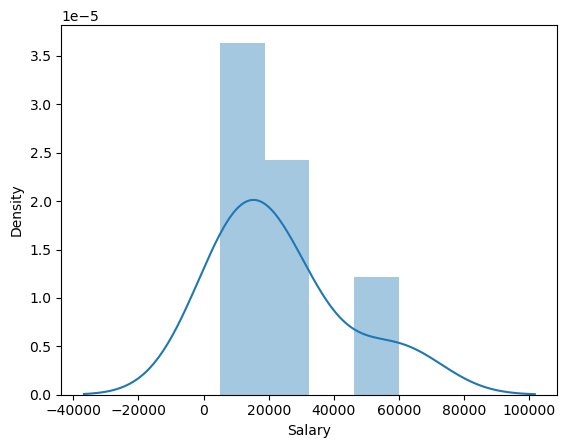

In [62]:
vis1 = sns.distplot(clean['Salary'])

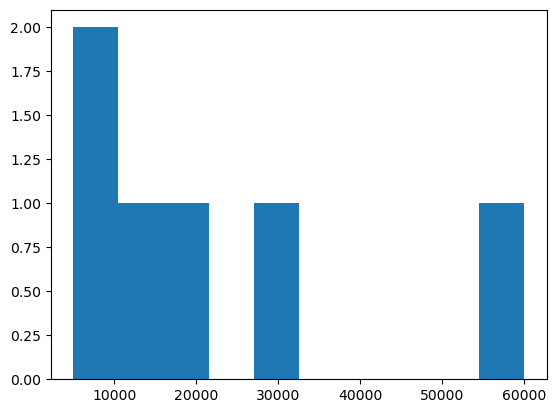

In [63]:
vis2 = plt.hist(clean['Salary'])

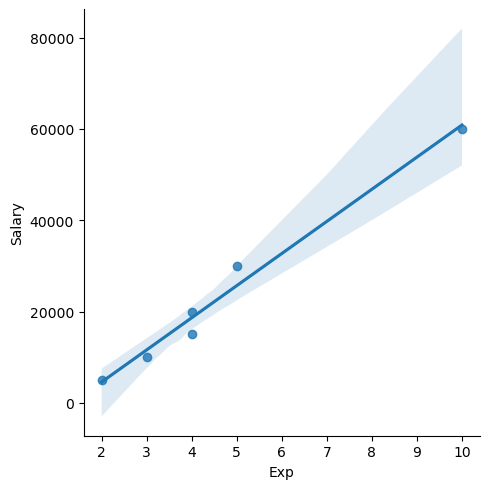

In [64]:
vis4 = sns.lmplot(data=clean,x = 'Exp', y='Salary')

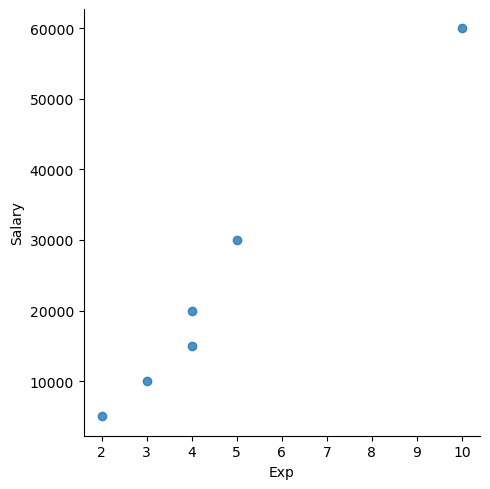

In [65]:
vis5 = sns.lmplot(data=clean,x = 'Exp', y='Salary', fit_reg = False)

# Independent and Dependent

In [66]:
X_iv = clean[['Name', 'Domain', 'Age', 'Location', 'Exp']]

In [67]:
y_dv = clean[['Salary']]

In [68]:
imputation = pd.get_dummies(clean)

In [69]:
imputation

,Age,Salary,Exp,Name_Jane,Name_Kim,Name_Mike,Name_Teddy,Name_Umar,Name_Uttam,Domain_Analytics,Domain_Dataanalyst,Domain_Datascience,Domain_NLP,Domain_Statistics,Domain_Testing,Location_Bangalore,Location_Delhi,Location_Hyderbad,Location_Mumbai
0,34,5000,2,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True
1,45,10000,3,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False
2,50,15000,4,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False
3,50,20000,4,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
4,67,30000,5,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False
5,55,60000,10,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False
